#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [50]:
first_name= "Mohammad Javad"
last_name= "Amin"
student_number= "401211193"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [52]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train[np.isnan(x_train)] = 0
x_test[np.isnan(x_test)] = 0

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Check for NaN values in a dataset
has_nan = np.isnan(x_train).any()

if has_nan:
    print("There are NaN values in the dataset.")
else:
    print("There are no NaN values in the dataset.")


There are no NaN values in the dataset.


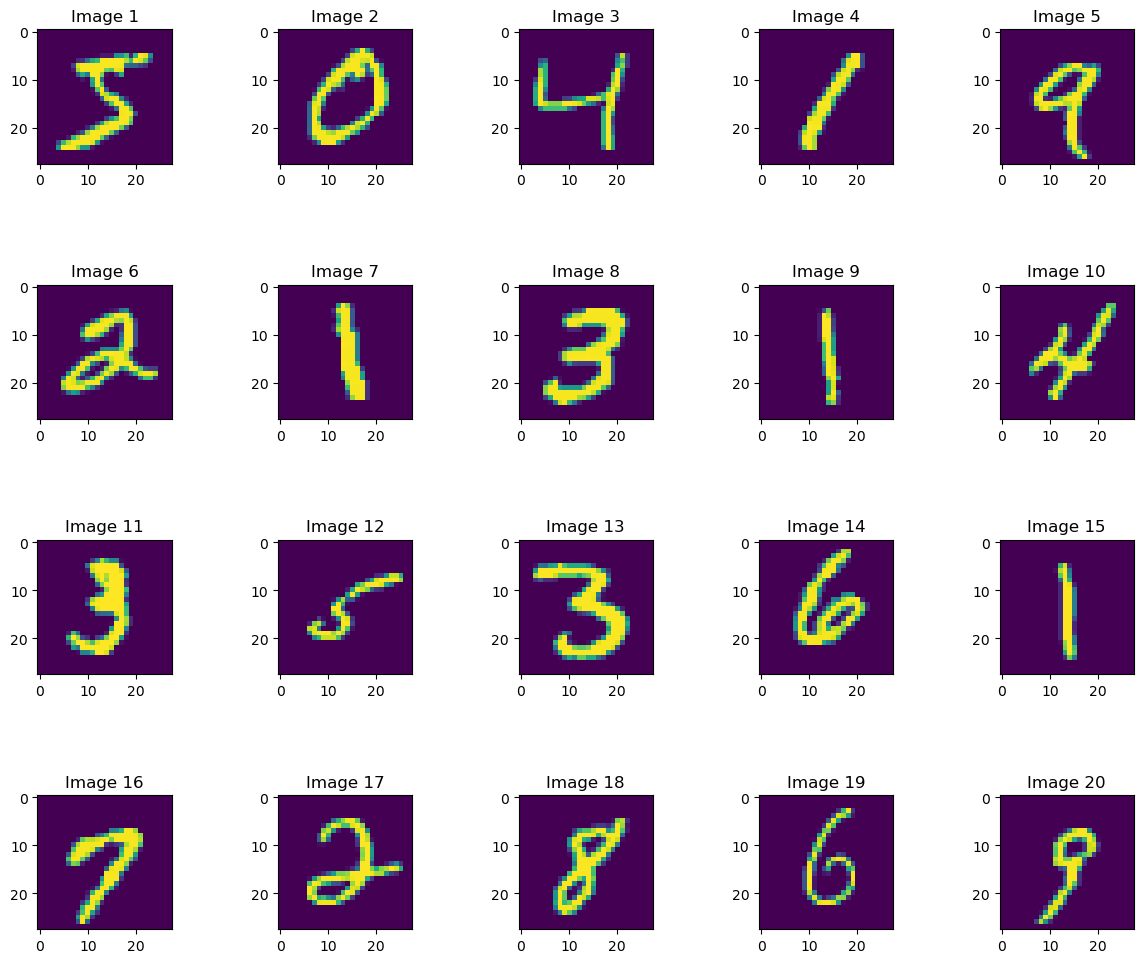

In [53]:
# here show 50 first of this images

def show_images(num_images,X):

    num_images= min(num_images,X.shape[0])
    row= num_images//5 + 1
    column= min(5,num_images)

    fig, axes = plt.subplots(row, column, figsize=(15, 15))

    # Increase the vertical spacing (hspace) between rows
    fig.subplots_adjust(hspace=0.9)
    fig.subplots_adjust(wspace=0.2)

    for i in range(num_images):
        if row==1:
            ax = axes[i]
        else:
            ax = axes[i // 5, i % 5]
    
        ax.imshow(X[i])
        ax.set_title(f"Image {i+1}")
        
        

    # Hide any remaining empty subplots
    for i in range(num_images, row * column):
        fig.delaxes(axes[i // 5, i % 5])


show_images(20,x_train)

In [54]:
#scale the data set to [0 1]
#divide data to maximum value .

x_train = x_train.reshape(x_train.shape[0], 28 * 28)  # Reshape all images to (784,)

for i in range(len(x_train)):  
    x_train[i] = x_train[i].astype('float32')/np.max(x_train[i])


در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [55]:
#calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.

# Calculate the covariance matrix
cov_matrix = np.cov(x_train, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [56]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.

# Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


total_eigenvalue=np.sum(eigenvalues)
sum=0
k=0
while True:
    sum+=eigenvalues[k]
    if sum/total_eigenvalue >= explained_variance:
        
        k=k+1
        break
    k+=1
print(k)
#calculate the compression_ratio
compression_ratio=k/len(eigenvalues)
print(compression_ratio)

26
0.03316326530612245


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

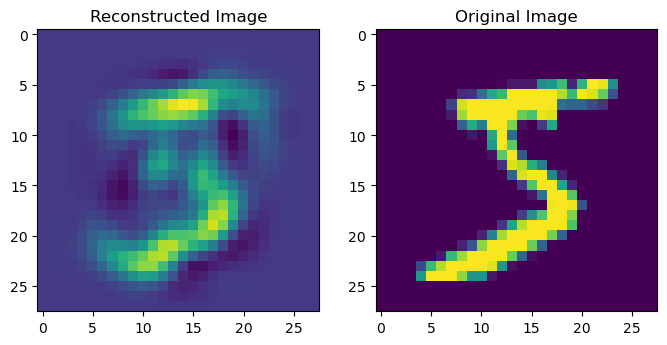

In [57]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

V=eigenvectors[:,:k]
F= x_train @ V
x_k= F @ V.T


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the dimensionally reduced data
axes[0].imshow(x_k[0].reshape(28, 28))
axes[0].set_title('Reconstructed Image')

# Plot the original data
axes[1].imshow(x_train[0].reshape(28, 28))
axes[1].set_title('Original Image')

plt.show()


## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [58]:
#complete below function using python PCA function
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def do_pca(n_components, data):
    
    pca = PCA(n_components)
    data = data.reshape(data.shape[0], 28 * 28)
    data_pca = pca.fit_transform(StandardScaler().fit_transform(data))
    return data_pca

In [59]:
# Random Forest Classifier
def ML_model_RF(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
   
    # Split the data into training and testing sets
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random forest model
    model = RandomForestClassifier(n_estimators=15, random_state=42)


    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    if print_output:
        print(f"Accuracy: {accuracy}")
    return accuracy

# Logistic Regression Classifier

def ML_model_LR(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
   
    # Split the data into training and testing sets
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Logistic regression model
    model = LogisticRegression(max_iter=1000, C=0.1)


    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    if print_output:
        print(f"Accuracy: {accuracy}")
    return accuracy


In [60]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components

(X,Y), _ =mnist.load_data()
X = X.astype('float32') 
acc_list, pc_list = [], []
for pc in range(2,101):
    accuracy = ML_model_RF(do_pca(pc,X), Y, print_output=False)
    acc_list.append(accuracy)
    pc_list.append(pc)

# Random Forest Classifier

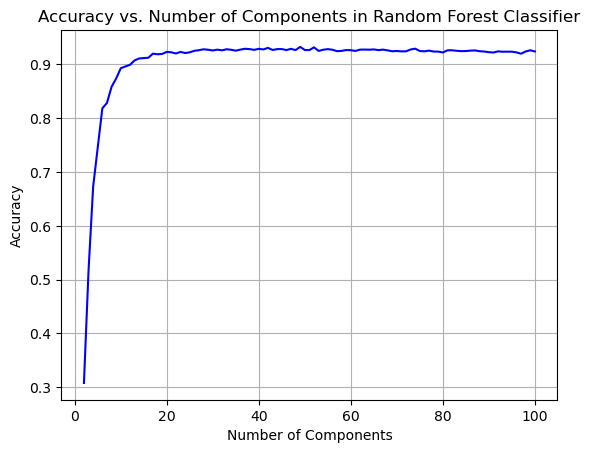

In [61]:
#plot the accuracy based on components.
plt.plot(pc_list, acc_list,color='b')
plt.title('Accuracy vs. Number of Components in Random Forest Classifier')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [62]:
#print the number of components that maximize the accuracy and the max accuracy
max_accurecay = max(acc_list)
max_index = acc_list.index(max_accurecay)
K_max=pc_list[max_index]
print('Random Forest Classifier')
print(f"Max accuracy: {max_accurecay}")
print(f"Number of componets: {K_max}")


Random Forest Classifier
Max accuracy: 0.9325
Number of componets: 49


# Logistic Regression

In [63]:
acc_list, pc_list = [], []
for pc in range(2,101):
    accuracy = ML_model_LR(do_pca(pc,X), Y, print_output=False)
    acc_list.append(accuracy)
    pc_list.append(pc)

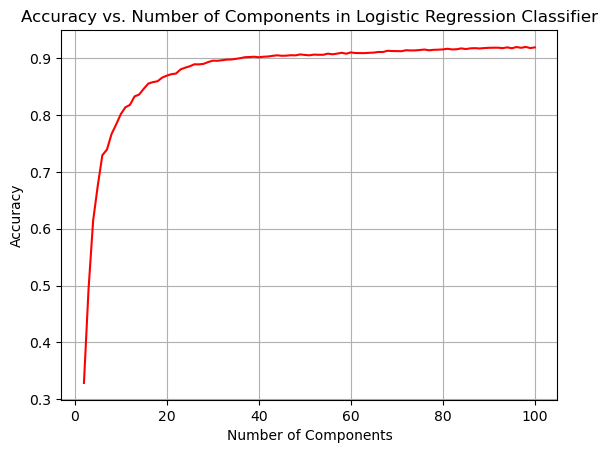

In [66]:
#plot the accuracy based on components.
plt.plot(pc_list, acc_list, color='r')
plt.title('Accuracy vs. Number of Components in Logistic Regression Classifier')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [67]:
#print the number of components that maximize the accuracy and the max accuracy
max_accurecay = max(acc_list)
max_index = acc_list.index(max_accurecay)
K_max=pc_list[max_index]
print('Logistic Classifier')
print(f"Max accuracy: {max_accurecay}")
print(f"Number of componets: {K_max}")


Logistic Classifier
Max accuracy: 0.9195
Number of componets: 98
